In [1]:
import pandas as pd

In [2]:
# data = pd.read_csv("extra_csv/Skyserver_SQL8_22_2024_8_39_07_PM.csv",  skiprows=1) # Dataset that we have

In [3]:
# data = pd.read_csv("extra_csv/Skyserver_SQL8_22_2024_8_39_07_PM.csv",  skiprows=1) # Dataset that we have
# data = pd.read_csv('../../../all_data.csv', index_col=0) # Big datapull without ordering
data = pd.read_csv("data_with_photo_z.csv", index_col=0) # Processed data with photo_z


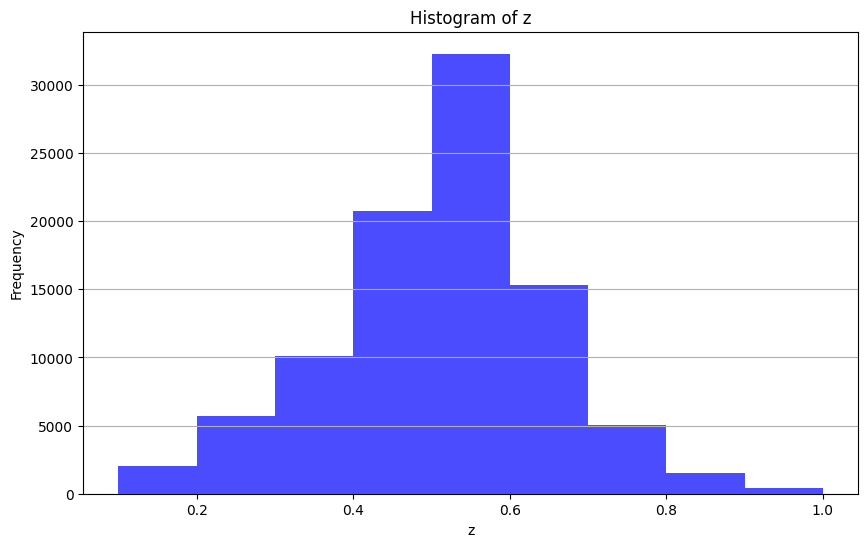

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame creation
np.random.seed(0)  # For reproducibility
# z_values = np.random.uniform(0.1, 1, 1000)
# df = pd.DataFrame({'z': z_values})

df = data.copy()


# Create histogram binning
bins = np.arange(0.1, 1.1, 0.1)
hist, bin_edges = np.histogram(df['z'], bins=bins)

# Create a DataFrame to store the histogram frequencies
hist_df = pd.DataFrame({'bin_start': bin_edges[:-1], 'bin_end': bin_edges[1:], 'frequency': hist})

# Cumulative frequency calculation
hist_df['cumulative_frequency'] = hist_df['frequency'].cumsum()

# Total frequency
total_frequency = hist_df['frequency'].sum()

# Determine the threshold for 70-30 split
threshold = 0.7 * total_frequency

# Identify the bins for the 70% split
hist_df['split'] = np.where(hist_df['cumulative_frequency'] <= threshold, 'train', 'test')

# Initialize train and test columns to 0
df['train'] = 0
df['test'] = 0

# Plotting function
def plot_histogram(dataframe, column):
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column], bins=np.arange(0.1, 1.1, 0.1), color='blue', alpha=0.7)
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Call the function to plot the histogram
plot_histogram(df, 'z')

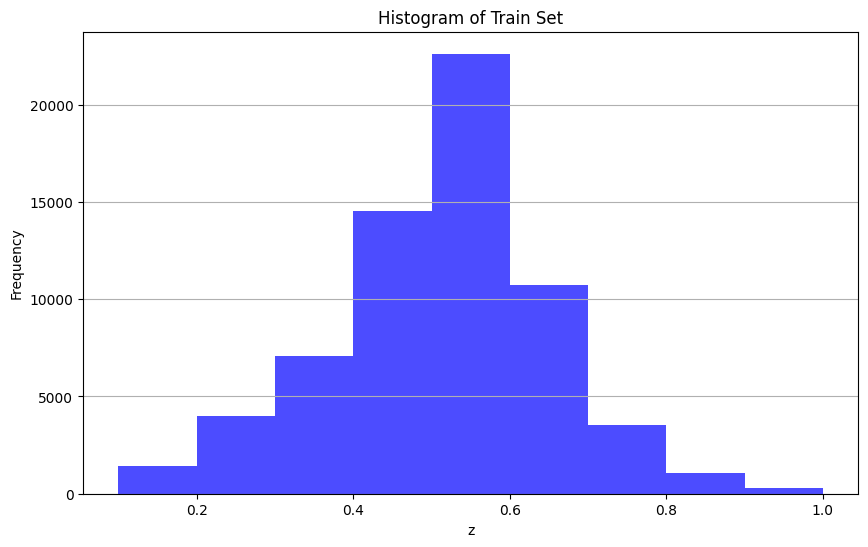

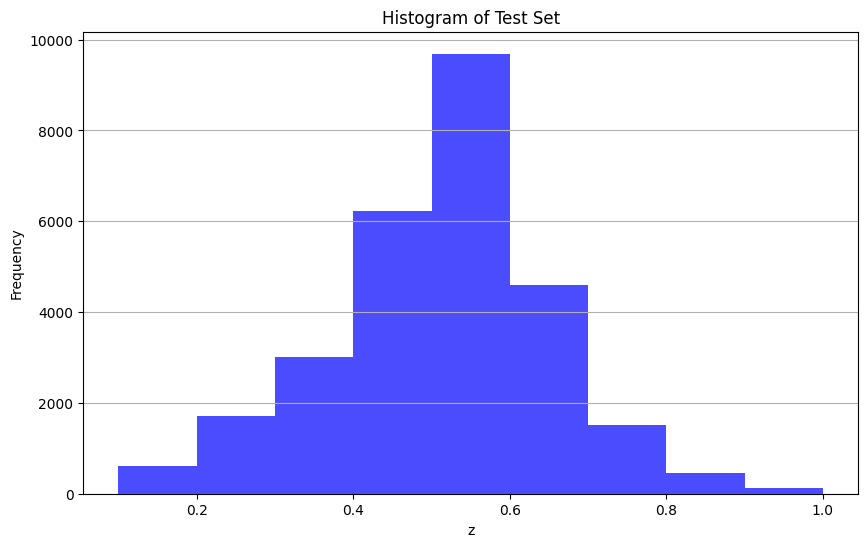

                 objID  run          ra       dec  rerun  camcol  field  \
0  1237645879551000764   94  348.841087  1.268802    301       6     93   
1  1237645879562928805   94   16.026029  1.266772    301       6    275   
2  1237645879573873373   94   41.019613  1.271279    301       6    442   
3  1237645941824356668  109   40.277836 -0.777074    301       2     37   
4  1237645941824357025  109   40.284751 -0.767711    301       2     37   

          z      zErr  template_photo_z  template_photo_zErr  bin  train  test  
0  0.399661  0.000078          0.378505             0.041041    2      1     0  
1  0.752730  0.000267          0.679374             0.068663    6      1     0  
2  0.504868  0.000213          0.487843             0.041076    4      0     1  
3  0.366744  0.000062          0.335330             0.085458    2      1     0  
4  0.626599  0.000152          0.613922             0.042154    5      0     1  


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example DataFrame creation
np.random.seed(0)  # For reproducibility
# z_values = np.random.uniform(0.1, 1, 1000)
# df = pd.DataFrame({'z': z_values})
df = data.copy()

# Create bins
bins = np.arange(0.1, 1.1, 0.1)
df['bin'] = pd.cut(df['z'], bins=bins, labels=False)

# Stratified sampling based on the bins
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['bin'], random_state=42)

# Assign train and test columns
df['train'] = 0
df['test'] = 0
df.loc[train_df.index, 'train'] = 1
df.loc[test_df.index, 'test'] = 1

# Plotting function
def plot_histogram(dataframe, column, title):
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column], bins=np.arange(0.1, 1.1, 0.1), color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Plot histograms for train and test sets
plot_histogram(train_df, 'z', 'Histogram of Train Set')
plot_histogram(test_df, 'z', 'Histogram of Test Set')

# Display the first few rows of the DataFrame
print(df.head())

In [7]:
df["train"].value_counts()
df["test"].value_counts()

test
0    65203
1    27945
Name: count, dtype: int64

In [10]:
assert df.shape[0] == df["train"].sum() + df["test"].sum()

In [11]:
assert set(df[df["train"] == 1].index).intersection(set(df[df["test"] == 1].index)) == set()

In [12]:
df

,objID,run,ra,dec,rerun,camcol,field,z,zErr,template_photo_z,template_photo_zErr,bin,train,test
0,1237645879551000764,94,348.841087,1.268802,301,6,93,0.399661,0.000078,0.378505,0.041041,2,1,0
1,1237645879562928805,94,16.026029,1.266772,301,6,275,0.752730,0.000267,0.679374,0.068663,6,1,0
2,1237645879573873373,94,41.019613,1.271279,301,6,442,0.504868,0.000213,0.487843,0.041076,4,0,1
3,1237645941824356668,109,40.277836,-0.777074,301,2,37,0.366744,0.000062,0.335330,0.085458,2,1,0
4,1237645941824357025,109,40.284751,-0.767711,301,2,37,0.626599,0.000152,0.613922,0.042154,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93143,1237651737930104852,1458,238.611230,2.586243,301,6,760,0.386295,0.000089,0.357126,0.026436,2,1,0
93144,1237651737930105252,1458,238.716829,2.698187,301,6,760,0.225066,0.000035,0.218370,0.012380,1,1,0
93145,1237651737930105584,1458,238.729344,2.730604,301,6,760,0.597112,0.000156,0.561252,0.052941,4,1,0
93146,1237651737930105614,1458,238.737942,2.616392,301,6,760,0.475276,0.000103,0.521465,0.040119,3,1,0


In [13]:
from sdss_access import Path

sdss_path = Path(release="dr17")
df["file_name"] = data.apply(
    lambda row: sdss_path.url(
        "frame",
        run=int(row["run"]),
        rerun=int(row["rerun"]),
        camcol=int(row["camcol"]),
        field=int(row["field"]),
        filter="x",
    ).split("/")[-1],
    axis=1,
)


In [15]:
train_df = df[df["train"] == 1]
test_df = df[df["test"] == 1]

In [19]:
assert set(test_df["objID"]).intersection(set(train_df["objID"])) == set() # Check for intersection. No intersection should be there

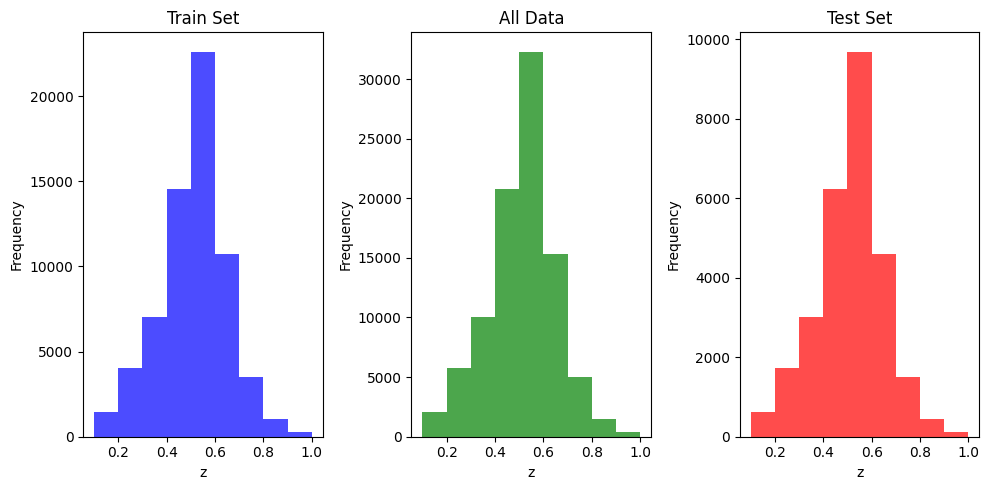

In [23]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Plot 'z' column in train_df
axs[0].hist(train_df['z'], bins=bins, color='blue', alpha=0.7)
axs[0].set_title('Train Set')
axs[0].set_xlabel('z')
axs[0].set_ylabel('Frequency')

# Plot 'z' column in train_df
axs[1].hist(df['z'], bins=bins, color='green', alpha=0.7)
axs[1].set_title('All Data')
axs[1].set_xlabel('z')
axs[1].set_ylabel('Frequency')

# Plot 'z' column in test_df
axs[2].hist(test_df['z'], bins=bins, color='red', alpha=0.7)
axs[2].set_title('Test Set')
axs[2].set_xlabel('z')
axs[2].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
assert set(test_df["objID"]).intersection(set(train_df["objID"])) == set() # Check for intersection. No intersection should be there
train_df.to_csv("train.csv")
test_df.to_csv("test.csv")
